In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Column Descriptors
FIRST NAME: First name of the data professional (String)

LAST NAME: Last name of the data professional (String)

SEX: Gender of the data professional (String: 'F' for Female, 'M' for Male)

DOJ (Date of Joining): The date when the data professional joined the company (Date in MM/DD/YYYY format)

CURRENT DATE: The current date or the snapshot date of the data (Date in MM/DD/YYYY format)

DESIGNATION: The job role or designation of the data professional (String: e.g., Analyst, Senior Analyst, Manager)

AGE: Age of the data professional (Integer)

SALARY: Annual salary of the data professional (Float)

UNIT: Business unit or department the data professional works in (String: e.g., IT, Finance, Marketing)

LEAVES USED: Number of leaves used by the data professional (Integer)

LEAVES REMAINING: Number of leaves remaining for the data professional (Integer)

RATINGS: Performance ratings of the data professional (Float)

PAST EXP: Past work experience in years before joining the current company (Float)

Provenance
Data Collection:
The dataset was compiled from internal HR records of a hypothetical company.
Each record represents a unique data professional with various attributes collected from their employment history.
The data spans from 2009 to 2016, capturing a snapshot as of January 7, 2016.
Data Organization:
The data has been organized chronologically by the date of joining (DOJ).
Each row represents an individual data professional.
Various attributes such as designation, department, and performance ratings have been included to enable comprehensive analysis.

View less
Usability
10.00

License
MIT

Expected update frequency
Annually

Tags

B

In [4]:
df = pd.read_csv('/content/Salary Prediction of Data Professions.csv')
df.head(10)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
5,VICTORIA,NaN,F,2-19-2013,01-07-2016,Analyst,22.0,48736,Marketing,20.0,10.0,4.0,0
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
7,JACQUES,AKMAL,M,12-05-2013,01-07-2016,Analyst,NaN,40058,Marketing,29.0,1.0,2.0,2
8,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1
9,LILIAN,APELA,F,11-11-2014,01-07-2016,Analyst,22.0,43110,Finance,15.0,15.0,3.0,0


In [5]:
df.shape

(2639, 13)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(2478, 13)

In [8]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [11]:
df.shape

(2470, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2470 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2470 non-null   object 
 1   LAST NAME         2470 non-null   object 
 2   SEX               2470 non-null   object 
 3   DOJ               2470 non-null   object 
 4   CURRENT DATE      2470 non-null   object 
 5   DESIGNATION       2470 non-null   object 
 6   AGE               2470 non-null   float64
 7   SALARY            2470 non-null   int64  
 8   UNIT              2470 non-null   object 
 9   LEAVES USED       2470 non-null   float64
 10  LEAVES REMAINING  2470 non-null   float64
 11  RATINGS           2470 non-null   float64
 12  PAST EXP          2470 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 270.2+ KB


In [13]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000
mean,24.725506,58055.764777,22.490688,7.509312,3.482186,1.555870
std,3.908838,36776.484770,4.597236,4.597236,1.115217,2.703656
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43401.250000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46737.500000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,50323.750000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [14]:
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2470 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FIRST NAME        2470 non-null   object        
 1   LAST NAME         2470 non-null   object        
 2   SEX               2470 non-null   object        
 3   DOJ               2470 non-null   datetime64[ns]
 4   CURRENT DATE      2470 non-null   datetime64[ns]
 5   DESIGNATION       2470 non-null   object        
 6   AGE               2470 non-null   float64       
 7   SALARY            2470 non-null   int64         
 8   UNIT              2470 non-null   object        
 9   LEAVES USED       2470 non-null   float64       
 10  LEAVES REMAINING  2470 non-null   float64       
 11  RATINGS           2470 non-null   float64       
 12  PAST EXP          2470 non-null   int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(5)
memory usage: 270.2+ KB


In [16]:
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [17]:
df['diff_years'] = (df['CURRENT DATE'] - df['DOJ']).dt.days / 365.25

In [18]:
df['Actual experience'] = df['PAST EXP'] + round(df['diff_years'], 4)
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,diff_years,Actual experience
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.639973,1.6400
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.445585,1.4456
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.762491,2.7625
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,2.346338,2.3463
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,1.524983,2.5250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10,4.528405,14.5284
2635,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,23.0,45758,IT,17.0,13.0,2.0,0,1.979466,1.9795
2636,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,21.0,47315,Web,29.0,1.0,5.0,0,1.954825,1.9548
2637,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,24.0,45172,Web,23.0,7.0,3.0,1,1.809719,2.8097


In [19]:
df.describe()

,DOJ,CURRENT DATE,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,diff_years,Actual experience
count,2470,2470,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000
mean,2013-10-29 17:07:14.331983616,2016-01-07 00:00:00,24.725506,58055.764777,22.490688,7.509312,3.482186,1.555870,2.188328,3.744199
min,2009-01-23 00:00:00,2016-01-07 00:00:00,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000,0.933607,0.933600
25%,2013-05-05 06:00:00,2016-01-07 00:00:00,22.000000,43401.250000,19.000000,4.000000,2.000000,0.000000,1.492129,2.141000
50%,2013-12-07 00:00:00,2016-01-07 00:00:00,24.000000,46737.500000,22.000000,8.000000,3.000000,1.000000,2.083504,2.853150
75%,2014-07-11 00:00:00,2016-01-07 00:00:00,25.000000,50323.750000,26.000000,11.000000,4.000000,2.000000,2.674196,3.970250
max,2015-01-31 00:00:00,2016-01-07 00:00:00,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000,6.954141,24.081500
std,NaN,NaN,3.908838,36776.484770,4.597236,4.597236,1.115217,2.703656,0.901114,3.038521


In [20]:
# persona que al momento de ingresar tenia lamayor cantidad de anos de experiencia
df[df['PAST EXP'] == np.max(df['PAST EXP'])]

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,diff_years,Actual experience
683,NUMBERS,AKIMSEU,M,2014-12-08,2016-01-07,Director,45.0,253284,IT,15.0,15.0,2.0,23,1.081451,24.0815


In [21]:
#persona que tiene actualmente la mayor cantidad de anos de experiencia
df[df['Actual experience'] == np.max(df['Actual experience'])]

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,diff_years,Actual experience
683,NUMBERS,AKIMSEU,M,2014-12-08,2016-01-07,Director,45.0,253284,IT,15.0,15.0,2.0,23,1.081451,24.0815


In [22]:
# Persona que lleva mas cantidad de tiempo trabajando en la empresa
df[df['diff_years'] == np.max(df['diff_years'])]

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,diff_years,Actual experience
172,DELPHINE,AREVALO,F,2009-01-23,2016-01-07,Director,43.0,284733,Web,15.0,15.0,2.0,11,6.954141,17.9541


In [23]:
# medidas estadisticas para la posicion de director en cuanto a su edad y salario
df[df['DESIGNATION'] == 'Director'][['AGE', 'SALARY']].describe()

,AGE,SALARY
count,27.000000,27.000000
mean,41.666667,294784.555556
std,2.038099,53396.210448
min,39.000000,213987.000000
25%,40.000000,236233.000000
50%,41.000000,313649.000000
75%,43.000000,323662.500000
max,45.000000,388112.000000


In [24]:
# Media de experiencia reuqerida para ingresar a un cargo por cargo laboral
df.groupby('DESIGNATION')['PAST EXP'].mean()

DESIGNATION
Analyst            0.656385
Associate          3.948387
Director          14.740741
Manager            6.974684
Senior Analyst     1.495017
Senior Manager    10.316667
Name: PAST EXP, dtype: float64

In [50]:
#media de salario por cargo laboral
media_s_c = df.groupby('DESIGNATION')['SALARY'].mean().sort_values(ascending=False)
media_s_c

DESIGNATION
Director          294784.555556
Senior Manager    178785.616667
Manager           126012.620253
Associate          87074.877419
Senior Analyst     59956.558140
Analyst            45028.621212
Name: SALARY, dtype: float64

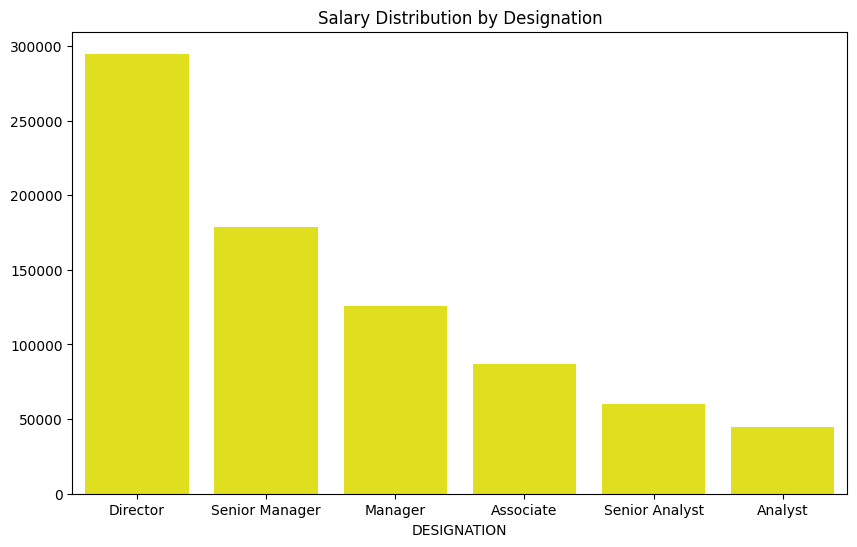

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x=media_s_c.index, y=media_s_c.values, color= 'Yellow')
plt.title('Salary Distribution by Designation')
plt.show()

In [49]:
#media salarial por departamento
media_s_d = df.groupby('UNIT')['SALARY'].mean().sort_values(ascending=False)
media_s_d

UNIT
Marketing     59212.687042
IT            59182.717890
Management    59063.949622
Finance       58130.887019
Web           57158.685139
Operations    55550.000000
Name: SALARY, dtype: float64

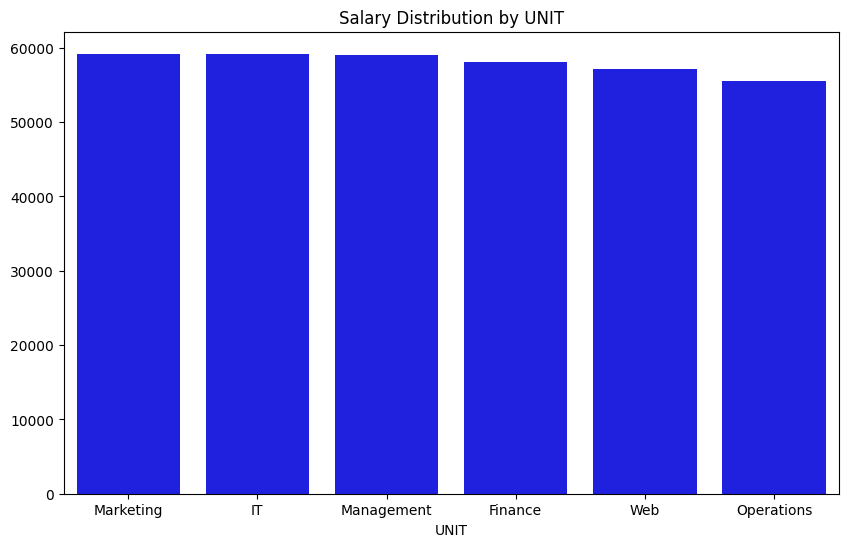

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x=media_s_d.index, y=media_s_d.values, color = 'Blue')
plt.title('Salary Distribution by UNIT')
plt.show()

In [55]:
media_s_g = df.groupby('SEX')['SALARY'].mean().sort_values(ascending=False)
media_s_g

SEX
F    58998.415936
M    57082.079835
Name: SALARY, dtype: float64

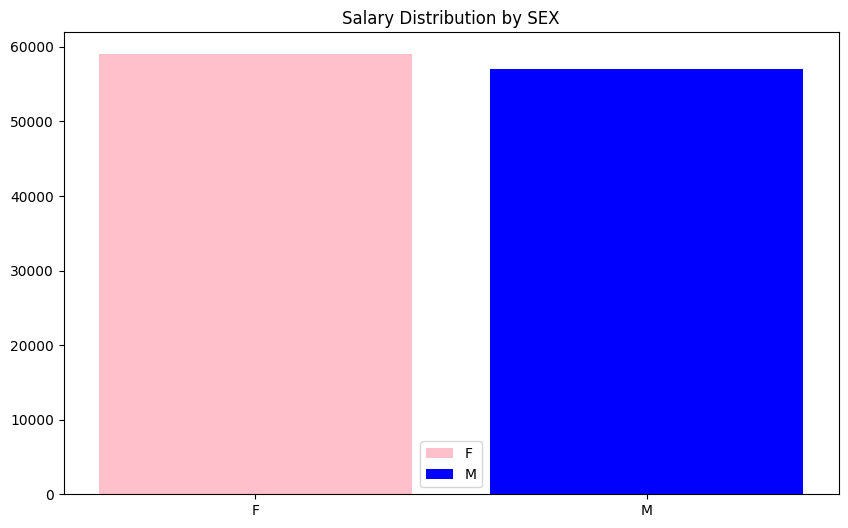

In [74]:

plt.figure(figsize=(10, 6))
plt.bar(x=media_s_g.index, height=media_s_g.values, label= media_s_g.index, color = ['pink', 'blue'])
plt.title('Salary Distribution by SEX')
plt.legend()


plt.show()


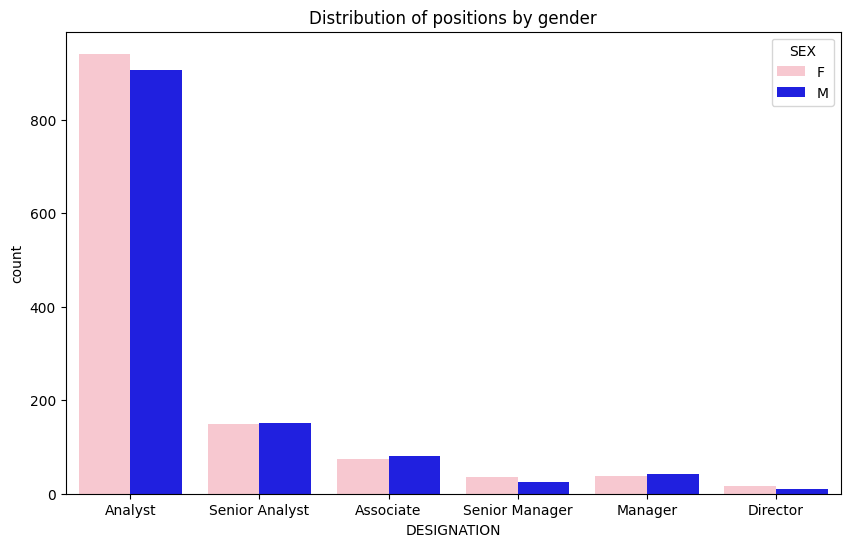

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DESIGNATION', hue='SEX', data=df, palette=['pink', 'blue'])
plt.title('Distribution of positions by gender')
plt.show()